# Load and tweet random Argo float data of the day

In [1]:
import os
from pathlib import Path
import twitter
import xarray as xr
import pandas as pd
import numpy as np
from argopy import DataFetcher as ArgoDataFetcher
from argopy.stores import indexstore, indexfilter_box
import argopy

from matplotlib import pyplot as plt
from matplotlib import image
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature = cfeature.NaturalEarthFeature(category='physical', name='land',
                                                scale='50m', facecolor=[0.4, 0.6, 0.7])
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 16

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

# Load one random Argo profile reported today

In [2]:
# Download this week index:
# ftp://ftp.ifremer.fr/ifremer/argo/ar_index_this_week_prof.txt
index_file = './ar_index_this_week_prof.txt'

cmd = "curl -o %s %s" % (index_file, "ftp://ftp.ifremer.fr/ifremer/argo/ar_index_this_week_prof.txt")
print(cmd)
os.system(cmd)

curl -o ./ar_index_this_week_prof.txt ftp://ftp.ifremer.fr/ifremer/argo/ar_index_this_week_prof.txt


0

In [3]:
# Then select today profiles:
DATE = (pd.to_datetime('now') - pd.DateOffset(days=0.0)).replace(hour=0, minute=0, second=0)
# print(DATE)

filt = indexfilter_box(BOX=[-180, 180, -90, 90, DATE, DATE+pd.DateOffset(days=1.0)])
df = indexstore(index_file=index_file).read_csv(filt)
df['wmo'] = df['file'].apply(lambda x: int(x.split('/')[1]))
print("%i Argo profiles reported today since %s" % (df.shape[0], DATE))
df = df.sample(1)
df

151 Argo profiles reported today since 2021-01-15 00:00:00.033760


,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,wmo
139,jma/2903400/profiles/R2903400_071.nc,2021-01-15 04:19:30,45.328999,162.632004,P,849,JA,2021-01-15 09:52:08,2903400


In [4]:
# Fetch data from ftp:
Path("dac").mkdir(parents=True, exist_ok=True)

dac = df['file'].values[0].split('/')[0]
wmo = df['wmo'].values[0]
cmd = "rsync -avzh --delete vdmzrs.ifremer.fr::argo/%s/%s dac/%s" % (dac, wmo, dac)
print(cmd)
os.system(cmd)

rsync -avzh --delete vdmzrs.ifremer.fr::argo/jma/2903400 dac/jma


0

In [5]:
last_cycle = int(df['file'].values[0].split('/')[-1].split("_")[-1].split('.')[0])
print(last_cycle)

71


In [6]:
with argopy.set_options(local_ftp='.'):
#     ds = ArgoDataFetcher(src='localftp', mode='expert').float([df['wmo'].values[0]]).to_xarray()
    ds = ArgoDataFetcher(src='localftp', mode='expert').profile([df['wmo'].values[0]], last_cycle).to_xarray()
    ds = ds.argo.point2profile()
ds

<xarray.Dataset>
Dimensions:                   (N_LEVELS: 1893, N_PROF: 1)
Coordinates:
  * N_PROF                    (N_PROF) int64 0
  * N_LEVELS                  (N_LEVELS) int64 0 1 2 3 4 ... 1889 1890 1891 1892
    TIME                      (N_PROF) datetime64[ns] 2021-01-15T04:19:30.000...
    LATITUDE                  (N_PROF) float64 45.33
    LONGITUDE                 (N_PROF) float64 162.6
Data variables:
    CONFIG_MISSION_NUMBER     (N_PROF) int64 1
    CYCLE_NUMBER              (N_PROF) int64 71
    DATA_CENTRE               (N_PROF) <U2 'JA'
    DATA_MODE                 (N_PROF) <U1 'R'
    DATA_STATE_INDICATOR      (N_PROF) <U4 '2B  '
    DC_REFERENCE              (N_PROF) <U32 '                                '
    DIRECTION                 (N_PROF) <U1 'A'
    FIRMWARE_VERSION          (N_PROF) <U32 '2.12.2.4                        '
    FLOAT_SERIAL_NO           (N_PROF) <U32 '49                              '
    PI_NAME                   (N_PROF) <U64 'JAMSTEC                         ...
    PLATFORM_NUMBER           (N_PROF) int64 2903400
    PLATFORM_TYPE             (N_PROF) <U32 'APEX_D                          '
    POSITIONING_SYSTEM        (N_PROF) <U8 'GPS     '
    POSITION_QC               (N_PROF) int64 1
    PRES                      (N_PROF, N_LEVELS) float32 6.3 4.8 ... 1993.7
    PRES_ADJUSTED             (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    PRES_ADJUSTED_ERROR       (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    PRES_ADJUSTED_QC          (N_PROF) int64 0
    PRES_QC                   (N_PROF, N_LEVELS) int64 1 1 1 1 1 1 ... 1 1 1 1 1
    PROFILE_PRES_QC           (N_PROF) <U1 'A'
    PROFILE_PSAL_QC           (N_PROF, N_LEVELS) <U1 'D' 'A' 'D' ... 'A' 'A' 'A'
    PROFILE_TEMP_QC           (N_PROF, N_LEVELS) <U1 'B' 'A' 'B' ... 'A' 'A' 'A'
    PROJECT_NAME              (N_PROF) <U64 '                                ...
    PSAL                      (N_PROF, N_LEVELS) float32 33.4437 ... 34.5911
    PSAL_ADJUSTED             (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    PSAL_ADJUSTED_ERROR       (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    PSAL_ADJUSTED_QC          (N_PROF) int64 0
    PSAL_QC                   (N_PROF, N_LEVELS) int64 1 1 1 1 1 1 ... 1 1 1 1 1
    TEMP                      (N_PROF, N_LEVELS) float32 4.9609 4.957 ... 1.9181
    TEMP_ADJUSTED             (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    TEMP_ADJUSTED_ERROR       (N_PROF, N_LEVELS) float32 nan nan nan ... nan nan
    TEMP_ADJUSTED_QC          (N_PROF) int64 0
    TEMP_QC                   (N_PROF, N_LEVELS) int64 1 1 1 1 1 1 ... 1 1 1 1 1
    TIME_LOCATION             (N_PROF) datetime64[ns] 2021-01-15T04:34:37
    TIME_QC                   (N_PROF) int64 1
    VERTICAL_SAMPLING_SCHEME  (N_PROF, N_LEVELS) <U256 'Primary sampling: dis...
    WMO_INST_TYPE             (N_PROF) int64 849
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         .
    Fetched_by:           gmaze
    Fetched_date:         2021/01/15
    Fetched_constraints:  phy;WMO2903400_CYC71
    Fetched_uri:          ./dac/jma/2903400/profiles/R2903400_071.nc
    history:              Transformed with point2profile

In [7]:
# Select the profile to work with:
this_ds = ds.isel(N_PROF=-1) # The last profile to date
this_ds

<xarray.Dataset>
Dimensions:                   (N_LEVELS: 1893)
Coordinates:
    N_PROF                    int64 0
  * N_LEVELS                  (N_LEVELS) int64 0 1 2 3 4 ... 1889 1890 1891 1892
    TIME                      datetime64[ns] 2021-01-15T04:19:30.000000256
    LATITUDE                  float64 45.33
    LONGITUDE                 float64 162.6
Data variables:
    CONFIG_MISSION_NUMBER     int64 1
    CYCLE_NUMBER              int64 71
    DATA_CENTRE               <U2 'JA'
    DATA_MODE                 <U1 'R'
    DATA_STATE_INDICATOR      <U4 '2B  '
    DC_REFERENCE              <U32 '                                '
    DIRECTION                 <U1 'A'
    FIRMWARE_VERSION          <U32 '2.12.2.4                        '
    FLOAT_SERIAL_NO           <U32 '49                              '
    PI_NAME                   <U64 'JAMSTEC                                  ...
    PLATFORM_NUMBER           int64 2903400
    PLATFORM_TYPE             <U32 'APEX_D                          '
    POSITIONING_SYSTEM        <U8 'GPS     '
    POSITION_QC               int64 1
    PRES                      (N_LEVELS) float32 6.3 4.8 11.0 ... 1991.9 1993.7
    PRES_ADJUSTED             (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    PRES_ADJUSTED_ERROR       (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    PRES_ADJUSTED_QC          int64 0
    PRES_QC                   (N_LEVELS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    PROFILE_PRES_QC           <U1 'A'
    PROFILE_PSAL_QC           (N_LEVELS) <U1 'D' 'A' 'D' 'A' ... 'A' 'A' 'A' 'A'
    PROFILE_TEMP_QC           (N_LEVELS) <U1 'B' 'A' 'B' 'A' ... 'A' 'A' 'A' 'A'
    PROJECT_NAME              <U64 '                                         ...
    PSAL                      (N_LEVELS) float32 33.4437 33.4441 ... 34.5911
    PSAL_ADJUSTED             (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    PSAL_ADJUSTED_ERROR       (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    PSAL_ADJUSTED_QC          int64 0
    PSAL_QC                   (N_LEVELS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    TEMP                      (N_LEVELS) float32 4.9609 4.957 ... 1.9219 1.9181
    TEMP_ADJUSTED             (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    TEMP_ADJUSTED_ERROR       (N_LEVELS) float32 nan nan nan nan ... nan nan nan
    TEMP_ADJUSTED_QC          int64 0
    TEMP_QC                   (N_LEVELS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    TIME_LOCATION             datetime64[ns] 2021-01-15T04:34:37
    TIME_QC                   int64 1
    VERTICAL_SAMPLING_SCHEME  (N_LEVELS) <U256 'Primary sampling: discrete [1...
    WMO_INST_TYPE             int64 849
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         .
    Fetched_by:           gmaze
    Fetched_date:         2021/01/15
    Fetched_constraints:  phy;WMO2903400_CYC71
    Fetched_uri:          ./dac/jma/2903400/profiles/R2903400_071.nc
    history:              Transformed with point2profile

# Create and save figures

## Utilities

In [8]:
def plot_profile(this, x='TEMP', y='PRES', title='?'):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,8), dpi=120)
    # fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(14,8))
    # axes = axes.flatten()
    # [ax.grid() for ax in axes]
#     axes.set_ylim([0, 2000])

    # ax = ax.flatten()
    this.plot.scatter(ax=axes, x=x, y=y, s=2)
    
    ymin, ymax = axes.get_ylim()
#     print(ymin, ymax)
    axes.set_ylim([0, ymax])
    axes.invert_yaxis()
    
    axes.set_title(title)

In [9]:
quadrant = 'E' if this_ds['LONGITUDE'] > 0 else 'W'
hemisphere = 'N' if this_ds['LATITUDE'] > 0 else 'S'
print(hemisphere, quadrant)

N E


In [10]:
from argopy.utilities import load_dict, mapp_dict
profiler_dictionnary = load_dict('profilers')
float_model = mapp_dict(profiler_dictionnary, this_ds['WMO_INST_TYPE'].values[np.newaxis][0])

In [11]:
# t = pd.to_datetime(str(this_ds['TIME'].values)).strftime('%Y.%m.%dT%H:%M:%S')
t = pd.to_datetime(str(this_ds['TIME'].values)).strftime('%A %d of %B %Y, %H:%M:%S UTC')
p = "%0.3f%s, %0.3f%s" % (np.abs(this_ds['LATITUDE']), hemisphere, np.abs(this_ds['LONGITUDE']), quadrant)
profile_title = "Float %s, cycle %i\nDate: %s\nPosition: %s" % (wmo, this_ds['CYCLE_NUMBER'], t, p)
print(profile_title, "\n")

Float 2903400, cycle 71
Date: Friday 15 of January 2021, 04:19:30 UTC
Position: 45.329N, 162.632E 



## Plots

-270.1049949169159 5777.8048974514


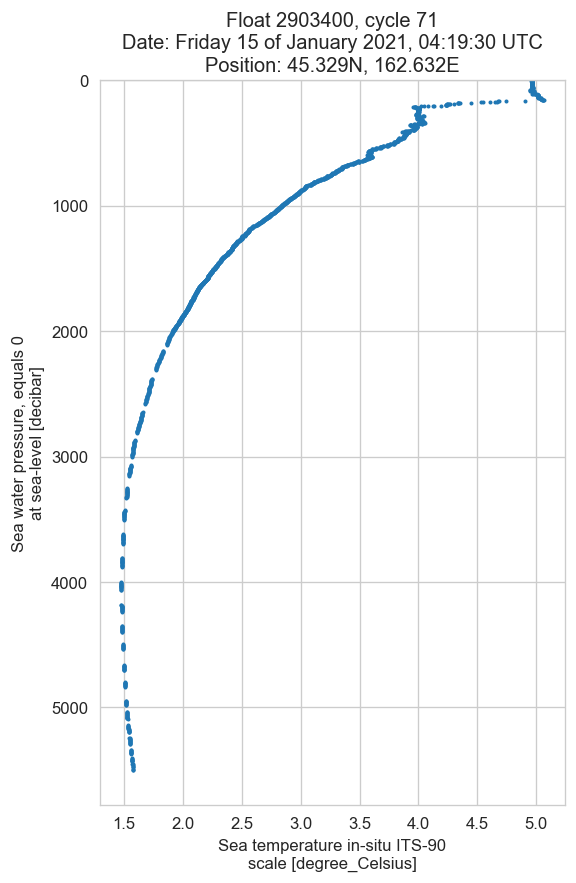

In [12]:
plot_profile(ds.isel(N_PROF=-1), x='TEMP', y='PRES', title=profile_title)
plt.savefig('TEMP.jpeg')

-270.1049949169159 5777.8048974514


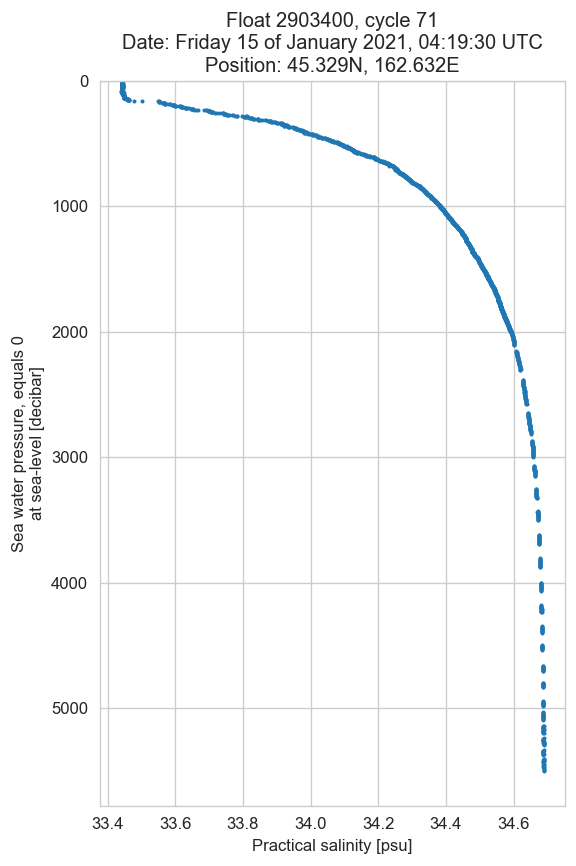

In [13]:
plot_profile(ds.isel(N_PROF=-1), x='PSAL', y='PRES', title=profile_title)
plt.savefig('PSAL.jpeg')

# Tweet this !

In [16]:
consumer_key, consumer_secret, access_key, access_secret = os.environ['TWITTER_SECRET'].split(':')

api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_key,
                  access_token_secret=access_secret)
api

In [17]:
media = []
for fname in ['TEMP.jpeg', 'PSAL.jpeg']:
    with open(fname, 'rb') as f:
        media.append(api.UploadMediaChunked(f))

In [18]:
# t = pd.to_datetime(str(this_ds['TIME'].values)).strftime('%Y.%m.%dT%H:%M:%S')
t = pd.to_datetime(str(this_ds['TIME'].values)).strftime('%A %d of %B %Y, %H:%M:%S UTC')
p = "%0.3f%s, %0.3f%s" % (np.abs(this_ds['LATITUDE']), hemisphere, np.abs(this_ds['LONGITUDE']), quadrant)
# long_title = "▶ Float %s, cycle %i ◀\n🗓 Date: %s\n🗺 Position: %s\n📏 Number of levels: %i\n🤖 Float model: %s\n🔬 Responsible Scientist: %s\n💳 Project: %s" % (
#     wmo, this_ds['CYCLE_NUMBER'], 
#     t, 
#     p, 
#     len(this_ds['N_LEVELS']),
#     float_model,
#     this_ds['PI_NAME'].values[np.newaxis][0].strip().title(), 
#     this_ds['PROJECT_NAME'].values[np.newaxis][0].strip())

long_title = "▶ Float %s, Cycle %i 🗓%s 🗺%s 📏%i measurements 🤖%s 🔬%s 💳%s" % (
    wmo, this_ds['CYCLE_NUMBER'], 
    t, 
    p, 
    len(this_ds['N_LEVELS']),
    float_model,
    this_ds['PI_NAME'].values[np.newaxis][0].strip().title(), 
    this_ds['PROJECT_NAME'].values[np.newaxis][0].strip())

print(long_title)

▶ Float 2903400, Cycle 71 🗓Friday 15 of January 2021, 04:19:30 UTC 🗺45.329N, 162.632E 📏1893 measurements 🤖Apex-D deep float 🔬Jamstec 💳


In [19]:
# t = pd.to_datetime(str(ds['TIME'].isel(N_PROF=-1).values)).strftime('%Y.%m.%dT%H:%M:%S')
# caption = (f'Argo float data\n'
#            f'Float ID: {wmo}\n'
#            f'Profile date: {t}\n'
#            f'https://fleetmonitoring.euro-argo.eu/float/{wmo}')
# caption

In [20]:
t = pd.to_datetime(str(ds['TIME'].isel(N_PROF=-1).values)).strftime('%Y.%m.%dT%H:%M:%S')
caption = (f'🏆 Here is the Argo profile of the day 🎉\n'
           f'{long_title}\n'
           f'https://fleetmonitoring.euro-argo.eu/float/{wmo} '
           f'#argofloat')
caption

'🏆 Here is the Argo profile of the day 🎉\n▶ Float 2903400, Cycle 71 🗓Friday 15 of January 2021, 04:19:30 UTC 🗺45.329N, 162.632E 📏1893 measurements 🤖Apex-D deep float 🔬Jamstec 💳\nhttps://fleetmonitoring.euro-argo.eu/float/2903400 #argofloat'

In [21]:
if len(caption)>280:
    caption = caption[0:275] + '...'

In [22]:
print(len(caption))

236


In [23]:
api.PostUpdate(caption, media=media)

Status(ID=1350079861939961860, ScreenName=argobot84, Created=Fri Jan 15 13:58:17 +0000 2021, Text='🏆 Here is the Argo profile of the day 🎉\n▶ Float 2903400, Cycle 71 🗓Friday 15 of January 2021, 04:19:30 UTC 🗺45.329N… https://t.co/G3VUDyjB4j')

***
This repository is maintained by:
<div>
<img src="https://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>